In [5]:
import numpy as np
import pandas as pd



data = {
    'Label': ['A', 'B', 'C', 'D'],
    'X1': [2, 2, 5, 6],
    'X2': [2, 3, 7, 6],
    'Y': [-10, -7, 11, 10]
}

df = pd.DataFrame(data)
print(df)


  Label  X1  X2   Y
0     A   2   2 -10
1     B   2   3  -7
2     C   5   7  11
3     D   6   6  10


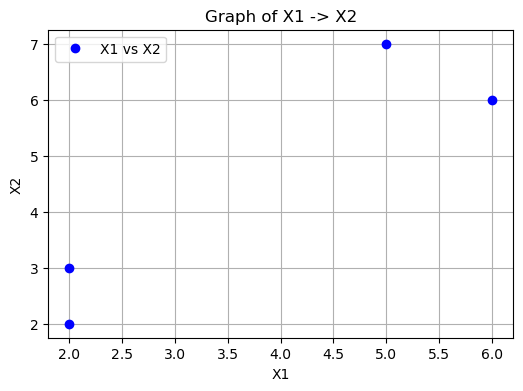

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(df["X1"], df["X2"], marker='o', color='b', linestyle='none', label='X1 vs X2')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Graph of X1 -> X2')
plt.legend()
plt.grid(True)
plt.show()
